## 4-2. 스크래핑 결과 시각화하기 I - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에선 다양한 질문이 올라왔는데,  
질문제목 아래에 "태그"가 있었습니다.

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 같습니다.  
이를 스크래핑 후 시각화해봅시다.

In [5]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15"}

In [6]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.

from bs4 import BeautifulSoup
import requests



In [26]:
# 응답을 바탕으로 BeautifulSoup 객체를 생성해봅시다.
import time

freq = {}

# 질문의 빈도를 체크하는 dict를 만든 후, 빈도를 체크해봅시다.
for i in range(1,11):
    res = requests.get(f'https://qna.programmers.co.kr/?page={i}', user_agent)
    soup = BeautifulSoup(res.text, 'html.parser')

    ul_tags = soup.find_all('ul', 'question-tags')
    for ul in ul_tags:
        a_tags = ul.find_all('a')
        for a in a_tags:
            #print(a.text.strip())
            t = a.text.strip()
            freq[t] = freq.get(t,0) + 1

    time.sleep(1)
    
freq   

{'c#': 6,
 'interface': 1,
 'class': 9,
 'inheritance': 2,
 'back-end': 1,
 'front-end': 1,
 'spring-boot': 1,
 'web': 2,
 'security': 1,
 'windows': 3,
 'firewall': 1,
 'python': 209,
 'selenium': 7,
 'beautifulsoup': 7,
 'urllib': 1,
 'unity': 1,
 'c': 45,
 'scraping': 2,
 'requests': 1,
 'spring': 4,
 'floatig-point': 1,
 'editor': 1,
 'html': 15,
 'css': 8,
 'mfc': 2,
 'pointer': 1,
 'array': 3,
 'c++': 22,
 'visual-studio-2010': 1,
 'java': 43,
 'http': 1,
 'socket-programming': 1,
 'coding-test': 10,
 'numpy': 4,
 'algorithm': 7,
 'tkinter': 4,
 'import': 3,
 'database': 2,
 'crawling': 9,
 'naver': 1,
 'react': 6,
 'axios': 3,
 's3': 1,
 'cloudfront': 1,
 'boot': 1,
 'exception': 1,
 'error': 9,
 'querying': 1,
 'opencv': 6,
 'pandas': 22,
 'excel': 4,
 'save': 1,
 'git': 2,
 'bat': 1,
 'batch': 1,
 'python3': 10,
 'bfs': 2,
 'statsmodels': 1,
 'file': 2,
 'txt': 1,
 'stackoverflow': 1,
 'ubuntu': 4,
 'gcc': 1,
 'intellij-idea': 2,
 'dataframe': 10,
 'global-variable': 1,
 'pyin

In [29]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.
from collections import Counter

cnt = Counter(freq)
cnt_list = cnt.most_common(10)
cnt_list

[('python', 209),
 ('c', 45),
 ('java', 43),
 ('c++', 22),
 ('pandas', 22),
 ('javascript', 19),
 ('html', 15),
 ('coding-test', 10),
 ('python3', 10),
 ('dataframe', 10)]

In [36]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.

x = list(map(lambda x : x[0],cnt_list))
y = list(map(lambda x : x[1],cnt_list))
x, y

(['python',
  'c',
  'java',
  'c++',
  'pandas',
  'javascript',
  'html',
  'coding-test',
  'python3',
  'dataframe'],
 [209, 45, 43, 22, 22, 19, 15, 10, 10, 10])

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

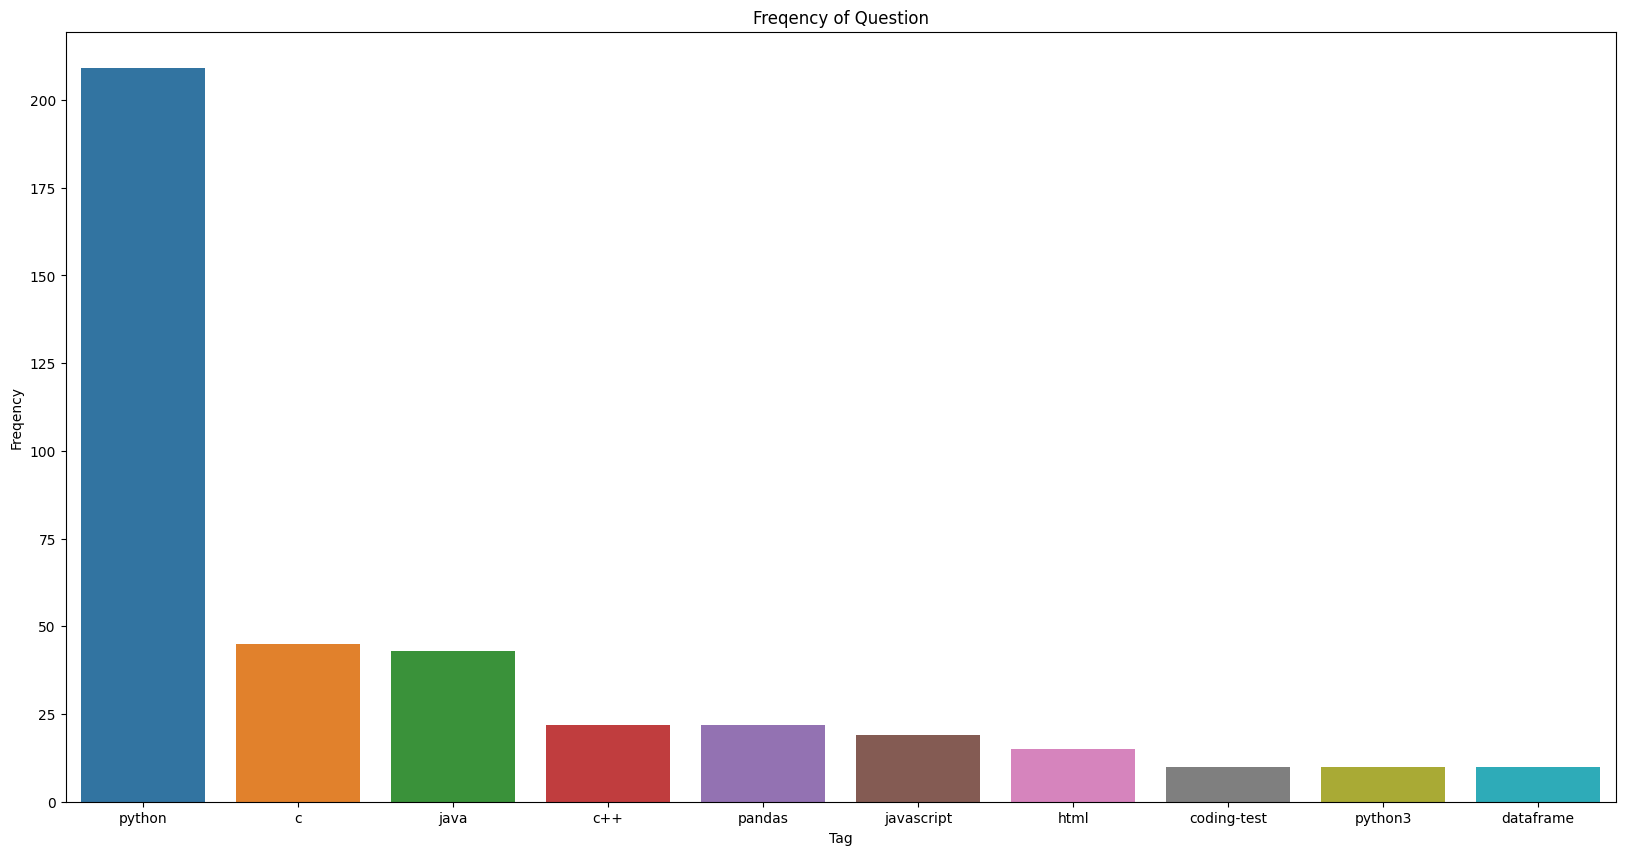

In [38]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
plt.title('Freqency of Question')
plt.xlabel('Tag')
plt.ylabel('Freqency')

sns.barplot(x=x,y=y)

plt.show()
